In [ ]:
# Instalando a biblioteca Kaggle
!pip install kaggle

In [ ]:
# Configurando as credenciais da Kaggle
import os

os.makedirs('/root/.kaggle', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Baixando o dataset do Kaggle
!kaggle datasets download -d ulrikthygepedersen/video-games-sales

In [ ]:
# Descompactando o arquivo do dataset baixado
!unzip video-games-sales.zip

In [ ]:
# Importando biblioteca pandas e lendo o arquivo com o dataset final
import pandas as pd

df = pd.read_csv('video_games_sales.csv')

In [ ]:
# Exibir o DataFrame para visualizar os dados
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Verificar a quantidade de valores nulos em cada coluna
df.isnull().sum()

,0
rank,0
name,0
platform,0
year,271
genre,0
publisher,58
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0


In [ ]:
# Exibir as linhas que contêm valores nulos
df[df.isnull().any(axis=1)]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Remover linhas com valores nulos do DataFrame original
df = df.dropna(inplace = True)

In [ ]:
# Verificar novamente valores nulos no DataFrame 
df.isna().sum()

,0
rank,0
name,0
platform,0
year,0
genre,0
publisher,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0


In [ ]:
# Exibir os nomes das colunas do DataFrame
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [ ]:
# Agrupar por publicadora, somar vendas globais, ordenar decrescente e selecionar os 10 maiores
df_top_publishers = df.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(10)

# Resetar o índice para transformar em DataFrame
df_top_publishers = df_top_publishers.reset_index()

# Renomeando colunas
df_top_publishers.columns = ['Publicadora', 'Vendas_totais']

# Exibir o DataFrame com as maiores publicadoras
df_top_publishers

,Publicadora,Vendas_totais
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72
5,Take-Two Interactive,399.54
6,THQ,340.77
7,Konami Digital Entertainment,283.64
8,Sega,272.99
9,Namco Bandai Games,254.09


In [ ]:
# Agrupar por publicadora, somar vendas na América do Norte, ordenar decrescente e selecionar os 5 maiores
top_publisher_na = df.groupby('publisher')['na_sales'].sum().sort_values(ascending=False).head(5)

# Exibir DataFrame com as maiores publicadoras na América do Norte
top_publisher_na

,na_sales
publisher,
Nintendo,815.75
Electronic Arts,584.22
Activision,426.01
Sony Computer Entertainment,265.22
Ubisoft,252.81


In [ ]:
# Agrupar por publicadora, somar vendas na Europa, ordenar decrescente e selecionar os 5 maiores
top_publisher_eu = df.groupby('publisher')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Exibir DataFrame com as maiores publicadoras na Europa
top_publisher_eu

,eu_sales
publisher,
Nintendo,418.30
Electronic Arts,367.38
Activision,213.72
Sony Computer Entertainment,187.55
Ubisoft,163.03


In [ ]:
# Agrupar por publicadora, somar vendas no Japão, ordenar decrescente e selecionar os 5 maiores
top_publisher_jp = df.groupby('publisher')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Exibir DataFrame com as maiores publicadoras no Japão
top_publisher_jp

,jp_sales
publisher,
Nintendo,454.99
Namco Bandai Games,126.84
Konami Digital Entertainment,90.93
Sony Computer Entertainment,74.10
Capcom,67.38


In [ ]:
# Agrupar por publicadora, somar vendas globais, ordenar decrescente e selecionar os 5 maiores
top_publisher_global = df.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(5)

# Exibir DataFrame com as maiores publicadoras globalmente
top_publisher_global

,global_sales
publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54


In [ ]:
# Agrupar por ano e somando as vendas globais
vendas_por_ano = df.groupby('year')['global_sales'].sum()

# Exibir DataFrame com vendas por ano
vendas_por_ano

,global_sales
year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


In [ ]:
# Filtrando apenas onde os anos são até 2015
vendas_por_ano = vendas_por_ano[vendas_por_ano.index <= 2015]

# Exibir DataFrame com vendas por ano
vendas_por_ano

,global_sales
year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36
1985.0,53.94
1986.0,37.07
1987.0,21.74
1988.0,47.22


In [ ]:
# Agrupar vendas por gênero para NA, EU, JP
top_genero = df.groupby('genre')[['na_sales','eu_sales', 'jp_sales']].sum()

# Encontrar o gênero com a maior venda em cada região
top_genero.idxmax()

,0
na_sales,Action
eu_sales,Action
jp_sales,Role-Playing


In [ ]:
# Agrupar por gênero e somando as vendas na América do Norte, ordenando decrescente e selecionando os 5 maiores
top_genero_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5)

# Exibir DataFrame com os maiores gêneros vendidos na América do Norte
top_genero_na

,na_sales
genre,
Action,877.83
Sports,683.35
Shooter,582.60
Platform,447.05
Misc,410.24


In [ ]:
# Agrupar por gênero e somando as vendas na Europa, ordenando decrescente e selecionando os 5 maiores
top_genero_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5)

# Exibir DataFrame com os maiores gêneros vendidos na Europa
top_genero_eu

,eu_sales
genre,
Action,525.00
Sports,376.85
Shooter,313.27
Racing,238.39
Misc,215.98


In [ ]:
# Agrupar por gênero e somando as vendas no Japão, ordenando decrescente e selecionando os 5 maiores
top_genero_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5)

# Exibir DataFrame com os maiores gêneros vendidos no Japão
top_genero_jp

,jp_sales
genre,
Role-Playing,352.31
Action,159.95
Sports,135.37
Platform,130.77
Misc,107.76


In [ ]:
# Agrupar por gênero e somando as vendas globais, ordenando decrescente e selecionando os 5 maiores
top_genero_global = df.groupby('genre')['global_sales'].sum().sort_values(ascending = False).head(5)

# Exibir DataFrame com os maiores gêneros vendidos globalmente
top_genero_global

,global_sales
genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37


In [ ]:
# Agrupar por plataforma e somando as vendas globais, ordenando decrescente e selecionando os 5 maiores
top_plataformas = df.groupby('platform')['global_sales'].sum().sort_values(ascending = False).head(5)

# Exibir DataFrame com as maiores plataformas vendidas globalmente
top_plataformas

,global_sales
platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49


In [ ]:
# Importando as bibliotecas matplotlib e seaborn para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

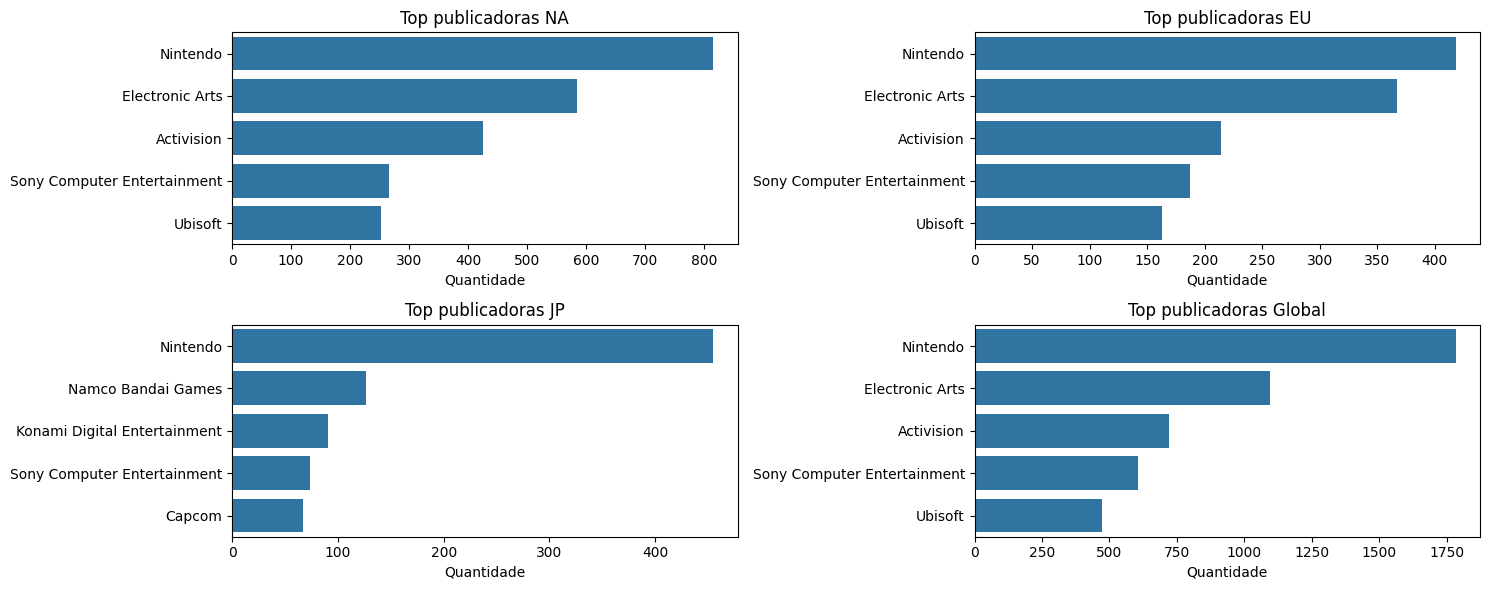

In [ ]:
# Criando gráficos de barras para as maiores publicadoras em diferentes regiões
fig, axs = plt.subplots(2,2, figsize = (15,6))

sns.barplot(x = top_publisher_na.values, y = top_publisher_na.index, ax = axs[0,0])
axs[0,0].set_title('Top publicadoras NA')
axs[0,0].set_xlabel('Quantidade')
axs[0,0].set_ylabel(None)

sns.barplot(x = top_publisher_eu.values, y = top_publisher_eu.index, ax = axs[0,1])
axs[0,1].set_title('Top publicadoras EU')
axs[0,1].set_xlabel('Quantidade')
axs[0,1].set_ylabel(None)

sns.barplot(x = top_publisher_jp.values, y = top_publisher_jp.index, ax = axs[1,0])
axs[1,0].set_title('Top publicadoras JP')
axs[1,0].set_xlabel('Quantidade')
axs[1,0].set_ylabel(None)

sns.barplot(x = top_publisher_global.values, y = top_publisher_global.index, ax = axs[1,1])
axs[1,1].set_title('Top publicadoras Global')
axs[1,1].set_xlabel('Quantidade')
axs[1,1].set_ylabel(None)


plt.tight_layout()
plt.show()

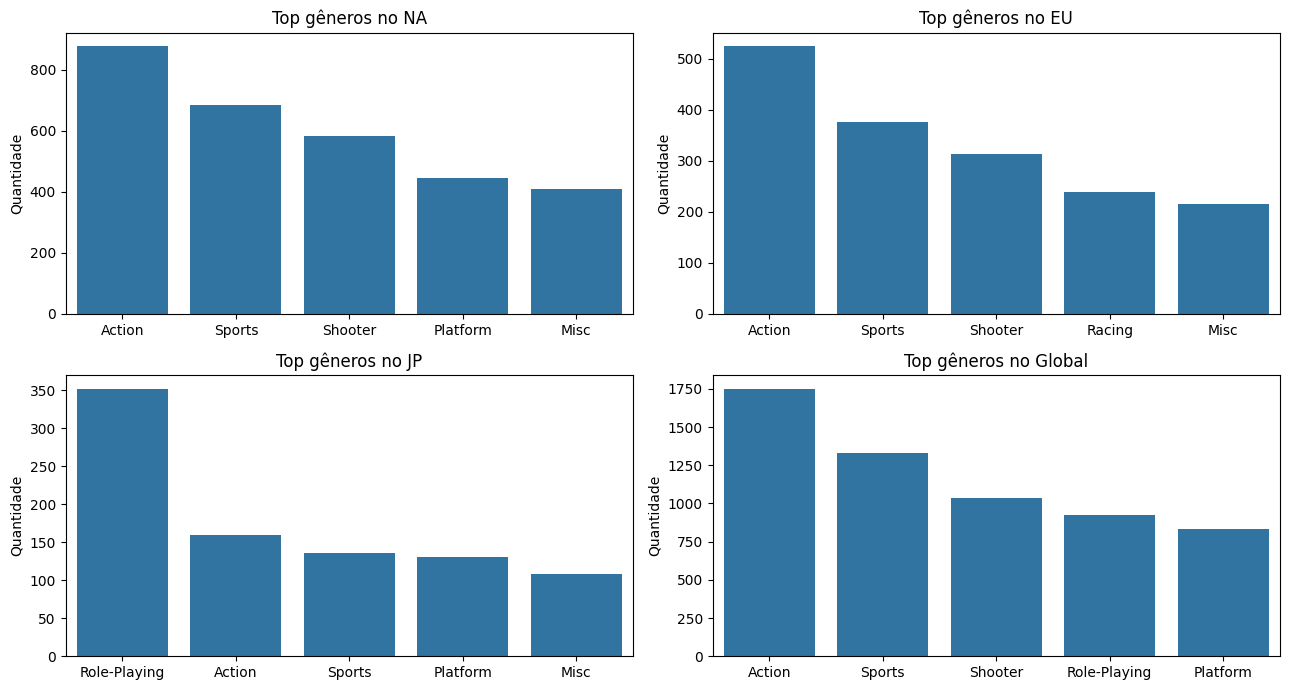

In [ ]:
# Criando gráficos de barras para os maiores gêneros vendidos em diferentes regiões
fig, axs = plt.subplots(2,2, figsize = (13,7))

sns.barplot(x = top_genero_na.index, y = top_genero_na.values, ax = axs[0,0])
axs[0,0].set_title('Top gêneros no NA')
axs[0,0].set_xlabel(None)
axs[0,0].set_ylabel('Quantidade')

sns.barplot(x = top_genero_eu.index, y = top_genero_eu.values, ax = axs[0,1])
axs[0,1].set_title('Top gêneros no EU')
axs[0,1].set_xlabel(None)
axs[0,1].set_ylabel('Quantidade')

sns.barplot(x = top_genero_jp.index, y = top_genero_jp.values, ax = axs[1,0])
axs[1,0].set_title('Top gêneros no JP')
axs[1,0].set_xlabel(None)
axs[1,0].set_ylabel('Quantidade')

sns.barplot(x = top_genero_global.index, y = top_genero_global.values, ax = axs[1,1])
axs[1,1].set_title('Top gêneros no Global')
axs[1,1].set_xlabel(None)
axs[1,1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

[]

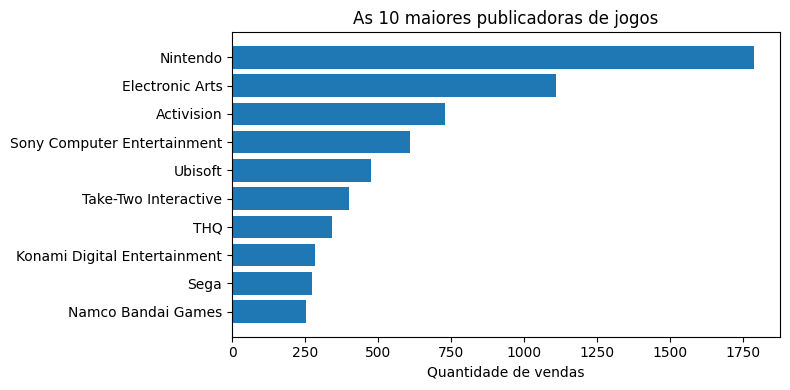

In [ ]:
# Criando gráfico de barras horizontal para as 10 maiores publicadoras de jogos
plt.figure(figsize = (8,4))
plt.barh(df_top_publishers['Publicadora'], df_top_publishers['Vendas_totais'])
plt.title('As 10 maiores publicadoras de jogos')
plt.xlabel('Quantidade de vendas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.plot()

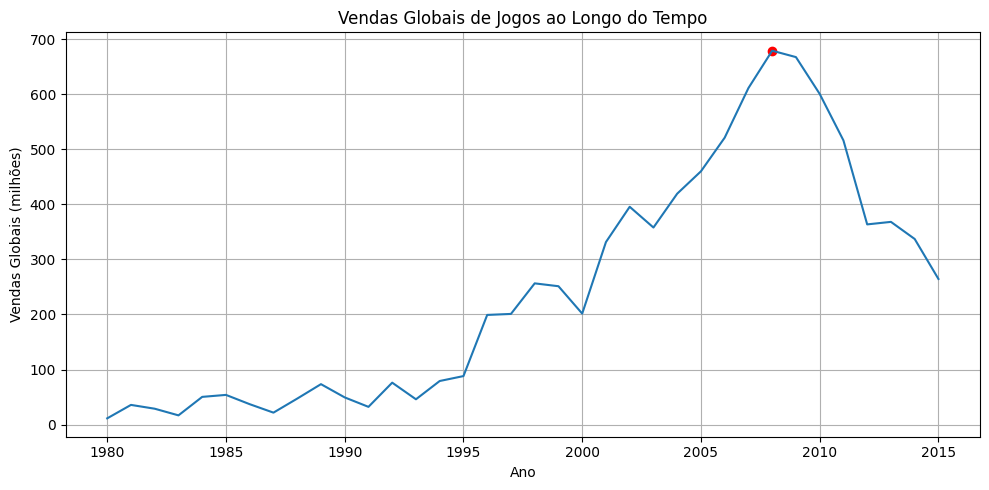

In [ ]:
# Criando gráfico de linha para vendas globais ao longo do tempo
ano_pico = vendas_por_ano.idxmax()
valor_pico = vendas_por_ano.max()

plt.figure(figsize=(10,5))
plt.plot(vendas_por_ano.index, vendas_por_ano.values)
plt.title('Vendas Globais de Jogos ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (milhões)')
plt.scatter(ano_pico, valor_pico, color = 'Red')
plt.grid(True)
plt.tight_layout()
plt.show()